# SVM - Weak Supervision + Augmentation

## import lib

In [1]:
import pandas as pd
import numpy as np
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, recall_score

C:\Users\arkan\anaconda3\envs\Skripshit\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Import dataset 

In [2]:
df = pd.read_csv("preprocessed_combined_dataset.csv")

In [3]:
df.head()

,label,text
0,0,bener jumat berkah malem ketemu malem ujansemo...
1,0,bencana geologi gempabumi tsunami letus gunung...
2,0,liverpool tsunami cidera nama
3,0,kemaren pas nerjang banjir ban motor liatin or...
4,1,gempa


In [4]:
# split the dataset into training and testing sets
train_data = df.text 
test_data = df.label 


In [5]:
print(train_data.shape)
print(test_data.shape)

(25504,)
(25504,)


## build model

In [6]:
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from transformers import AutoTokenizer, TFAutoModel
from sklearn.pipeline import Pipeline
from sklearn import svm

tokenizer = AutoTokenizer.from_pretrained("MoritzLaurer/mDeBERTa-v3-base-xnli-multilingual-nli-2mil7")

classifier = Pipeline([
    ('vect', CountVectorizer(tokenizer=tokenizer.tokenize)),
    #('tfidf', TfidfTransformer()),
    ('clf', svm.SVC(kernel='linear'))
])

classifier.fit(X=train_data, y=test_data,)

Pipeline(steps=[('vect',
                 CountVectorizer(tokenizer=<bound method PreTrainedTokenizerFast.tokenize of DebertaV2TokenizerFast(name_or_path='MoritzLaurer/mDeBERTa-v3-base-xnli-multilingual-nli-2mil7', vocab_size=250101, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '[CLS]', 'eos_token': '[SEP]', 'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True)>)),
                ('clf', SVC(kernel='linear'))])

## model eval and performance metrics

In [7]:
# compute the train accuracy
accuracy = classifier.score(
    X=train_data,
    y=test_data,
)

print(f"Test accuracy: {accuracy}")

Test accuracy: 0.9374607904642409


In [8]:
test = pd.read_csv("preprocessed_test.csv")
# extract text and labels
X_test = test.text
y_test = test.label

In [9]:
print(X_test.shape)
print(y_test.shape)

(1803,)
(1803,)


In [10]:
# compute the test accuracy
accuracy = classifier.score(
    X=X_test,
    y=y_test,
)

print(f"Test accuracy: {accuracy}")

Test accuracy: 0.968940654464781


In [11]:
from sklearn import metrics

# get predictions for the test set
predicted = classifier.predict(X_test)

print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       883
           1       0.97      0.96      0.97       920

    accuracy                           0.97      1803
   macro avg       0.97      0.97      0.97      1803
weighted avg       0.97      0.97      0.97      1803



In [12]:
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate and print the confusion matrix
conm = confusion_matrix(y_test, predicted)

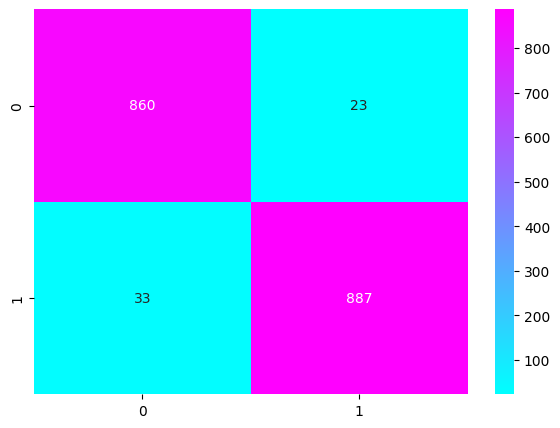

In [13]:
plt.figure(figsize=(7, 5))
sns.heatmap(conm, annot=True, fmt='d', cmap='cool')
plt.show()